## 导入所需要的库

In [569]:
# 数据分析和整理
import pandas as pd
import numpy as np
import random as rnd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 特征工程
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 机器学习模型
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#模型检验
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

## 获取数据

<img src="评分卡.jpg" width="40%">

In [184]:
#读取用户申请信息表数据
train_data=pd.read_csv("cs-training.csv",index_col=0)

## 数据初步探索

In [185]:
train_data.shape

(150000, 11)

In [186]:
train_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [187]:
train_data.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [188]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [189]:
#查看缺失值
train_data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [190]:
#查看数据分布
train_data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.0,0.002969,0.029867,0.154181,0.559046,0.981278,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.0,0.030874,0.175074,0.366508,0.868254,1267.000000,4979.040000,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,0.0,2005.000000,3400.000000,5400.000000,8249.000000,11666.000000,25000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


## 数据初步分析

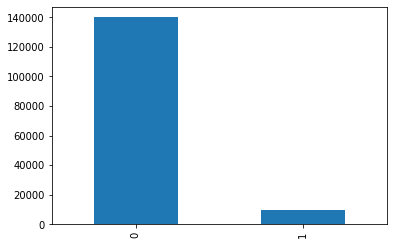

In [191]:
# 样本分布情况
train_data['SeriousDlqin2yrs'].value_counts().plot.bar()

### 填充缺失值

In [192]:
def fill_missing(data,to_fill):
    df=data.copy()
    columns=[*df.columns]
    columns.remove(to_fill)
    columns.remove("NumberOfDependents")
    x=df.loc[:,columns]
    y=df.loc[:,to_fill]
    x_train=x.loc[df[to_fill].notnull()]
    x_pred=x.loc[df[to_fill].isnull()]
    y_train=y.loc[df[to_fill].notnull()]
    model=RandomForestRegressor(random_state=0,
                               n_estimators=200,
                               max_depth=3,
                               n_jobs=-1)
    model.fit(x_train,y_train)
    pred=model.predict(x_pred)
    df.loc[df[to_fill].isnull(),to_fill]=pred
    return df

In [193]:
train_data=fill_missing(train_data,'MonthlyIncome')

In [194]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [195]:
train_data[['SeriousDlqin2yrs', 'NumberOfDependents']].groupby(['NumberOfDependents']).mean().sort_values(by='SeriousDlqin2yrs', ascending=False)

,SeriousDlqin2yrs
NumberOfDependents,
6.0,0.151899
4.0,0.103774
7.0,0.098039
5.0,0.091153
3.0,0.088263
8.0,0.083333
2.0,0.081139
1.0,0.073529
0.0,0.058629


In [196]:
# 家庭成员数不同违约情况不同，说明NumberOfDependents对违约产生影响
# 有部分缺失值


In [197]:
train_data.dropna(inplace=True)

### 处理异常值

In [198]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        146076 non-null int64
RevolvingUtilizationOfUnsecuredLines    146076 non-null float64
age                                     146076 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    146076 non-null int64
DebtRatio                               146076 non-null float64
MonthlyIncome                           146076 non-null float64
NumberOfOpenCreditLinesAndLoans         146076 non-null int64
NumberOfTimes90DaysLate                 146076 non-null int64
NumberRealEstateLoansOrLines            146076 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    146076 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.4 MB


In [199]:
col=["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse","NumberOfTimes90DaysLate"]

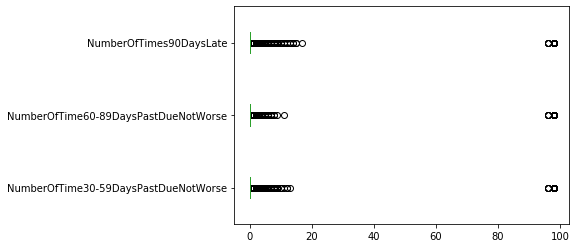

In [200]:
train_data[col].plot.box(vert=False)

In [201]:
for i in col:
    train_data=train_data.loc[train_data[i]<90]

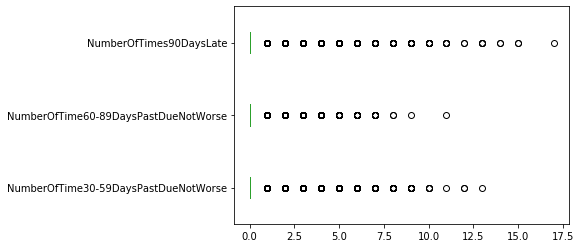

In [202]:
train_data[col].plot.box(vert=False)

### 划分数据集

In [203]:
Y=train_data['SeriousDlqin2yrs']
X=train_data.iloc[:,1:]

In [204]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [205]:
model_data=pd.concat([Y_train,X_train],axis=1)

In [206]:
test_data=pd.concat([Y_test,X_test],axis=1)

### 数据初步统计分析

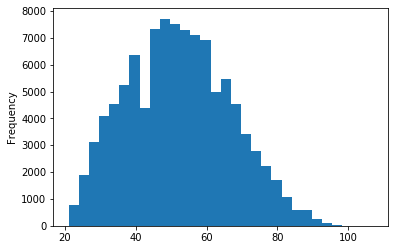

In [207]:
model_data.age.plot.hist(bins=30)

In [208]:
model_data.describe([0.1,0.99]).T

,count,mean,std,min,10%,50%,99%,max
SeriousDlqin2yrs,102086.0,0.065886,0.248083,0.0,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,102086.0,6.288841,262.975927,0.0,0.003364,0.158667,1.095083,50708.0
age,102086.0,52.161521,14.593852,21.0,33.000000,52.000000,86.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,102086.0,0.248702,0.702982,0.0,0.000000,0.000000,3.000000,13.0
DebtRatio,102086.0,335.613964,1944.056961,0.0,0.032258,0.358489,4957.300000,326442.0
MonthlyIncome,102086.0,6168.471063,15253.842149,0.0,1200.000000,5000.000000,23500.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,102086.0,8.559538,5.158380,0.0,3.000000,8.000000,25.000000,58.0
NumberOfTimes90DaysLate,102086.0,0.090580,0.482067,0.0,0.000000,0.000000,2.000000,17.0
NumberRealEstateLoansOrLines,102086.0,1.034784,1.131270,0.0,0.000000,1.000000,5.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,102086.0,0.065298,0.330054,0.0,0.000000,0.000000,2.000000,9.0


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


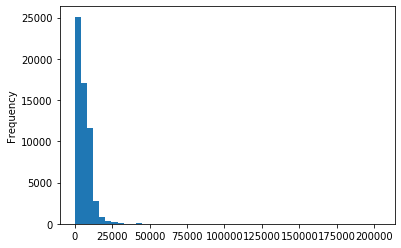

In [209]:
model_data.MonthlyIncome.loc[model_data.MonthlyIncome].plot.hist(bins=50)

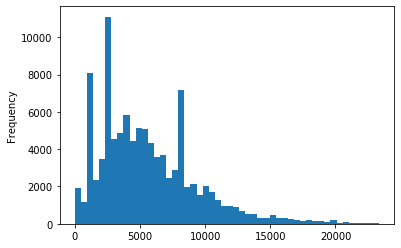

In [210]:
model_data.MonthlyIncome.loc[model_data.MonthlyIncome<23400].plot.hist(bins=50)

In [219]:
model_data.MonthlyIncome.min()

0.0

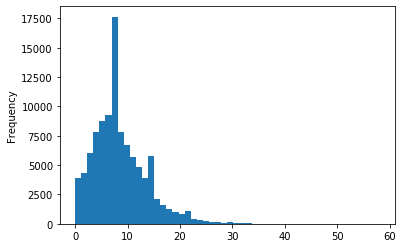

In [211]:
model_data.NumberOfOpenCreditLinesAndLoans.plot.hist(bins=50)

In [212]:
#绘制变量关系的相关关系矩阵
model_corr = model_data.corr()
model_corr

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001273,-0.111103,0.277263,-0.006268,-0.016072,-0.026190,0.314921,-0.008480,0.267957,0.045772
RevolvingUtilizationOfUnsecuredLines,-0.001273,1.000000,-0.006097,-0.002319,0.005603,0.007429,-0.011798,-0.000980,0.006217,-0.002677,0.000450
age,-0.111103,-0.006097,1.000000,-0.069951,0.025147,0.018171,0.155567,-0.081536,0.039654,-0.071272,-0.215945
NumberOfTime30-59DaysPastDueNotWorse,0.277263,-0.002319,-0.069951,1.000000,0.005735,0.001242,0.075578,0.221918,0.036840,0.314032,0.059798
DebtRatio,-0.006268,0.005603,0.025147,0.005735,1.000000,-0.013740,0.051575,-0.009821,0.117247,-0.004386,-0.039212
MonthlyIncome,-0.016072,0.007429,0.018171,0.001242,-0.013740,1.000000,0.090176,-0.018918,0.125488,-0.010370,0.069452
NumberOfOpenCreditLinesAndLoans,-0.026190,-0.011798,0.155567,0.075578,0.051575,0.090176,1.000000,-0.098037,0.428973,-0.025217,0.065344
NumberOfTimes90DaysLate,0.314921,-0.000980,-0.081536,0.221918,-0.009821,-0.018918,-0.098037,1.000000,-0.065952,0.290544,0.032145
NumberRealEstateLoansOrLines,-0.008480,0.006217,0.039654,0.036840,0.117247,0.125488,0.428973,-0.065952,1.000000,-0.028068,0.127400
NumberOfTime60-89DaysPastDueNotWorse,0.267957,-0.002677,-0.071272,0.314032,-0.004386,-0.010370,-0.025217,0.290544,-0.028068,1.000000,0.037127


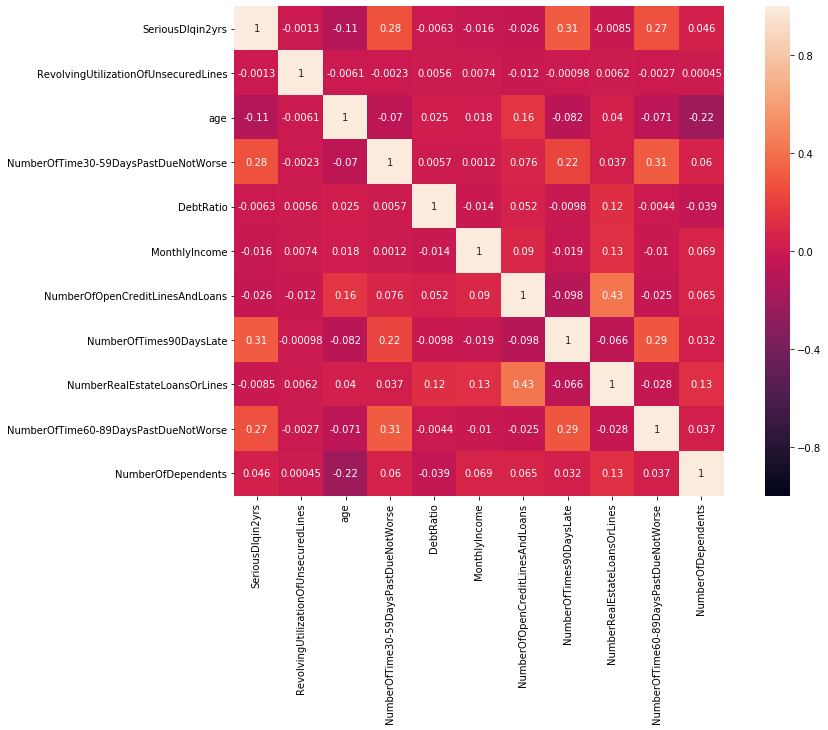

In [213]:
#画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(model_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

### 变量选择

#### 分组

##### 类别较多的分组

In [214]:
# 自动最优分组函数

In [251]:
def auto_bin(DF,X,Y,n=3,iv=True,woe=False,q=20):
    DF=DF[[X,Y]].copy()
    #按照等深进行分箱
    DF['qcut'],bins=pd.qcut(DF[X],q=20,retbins=True,duplicates='drop')
    #统计每个分箱中SeriousDlqin2yrs 0,1的数量
    count_y0=DF.loc[DF[Y]==0].groupby(by='qcut')[Y].count()
    count_y1=DF.loc[DF[Y]==1].groupby(by='qcut')[Y].count()
    #每个区间的上界，下届，0的频数，1的频数
    num_bins=[*zip(bins,bins[1:],count_y0,count_y1)]

    #确保每一个分组中都包含0和1
    for i in range(20):
        #如果第一组没有0或1，向后合并
        if 0 in num_bins[0][2:]:
            num_bins[0:2]=[(
                num_bins[0][0],
                num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
            continue
        #其他组没有0或1，向前合并
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1]=[(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i-1][3])]
                break
        else:
                break
    #定义计算woe的函数
    def get_woe(num_bins):
        columns=["min","max","good","bad"]
        df=pd.DataFrame(num_bins,columns=columns)
        df['total']=df.good+df.bad
        df['percebtage']=df.total/df.total.sum()
        df["woe"]=np.log((df.good/df.good.sum())/(df.bad/df.bad.sum()))
        return df
    #定义计算IV值函数
    def get_iv(bins_df):
        rate=((bins_df.good/bins_df.good.sum())-(bins_df.bad/bins_df.bad.sum()))
        iv=np.sum(rate*bins_df.woe)
        return iv
#基于卡方检验进行分析。
#原假设：观察频数与期望的频数没有差异
#如果P很小意味着两者偏离程度比较大，应该拒绝原假设
#获取两两之间的卡方检验的置信度，如果p比较大
#n为保留的最小组数
    
    while len(num_bins)>n:
        pvs=[]
        for i in range(len(num_bins)-1):
            x1=num_bins[i][2:]
            x2=num_bins[i+1][2:]
            pv=scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        #将P值最大两组进行合并  
        i=pvs.index(max(pvs))
        num_bins[i:i+2]=[(
        num_bins[i][0],
        num_bins[i+1][1],
        num_bins[i][2]+num_bins[i+1][2],
        num_bins[i][3]+num_bins[i+1][3])]
        #打印每组的分箱信息（woe，iv）
        bins_df=get_woe(num_bins)
        if iv:
            print(f"{X}分{len(num_bins):2}组的IV值",get_iv(bins_df))
        if woe:
            print(bins_df)
    return get_woe(num_bins)

In [239]:
# #查看每一个字段，观察是否需要自动分箱
for i in model_data.columns:
    print (i)
    model_counts = model_data[i].value_counts().count()
    print (model_counts)

SeriousDlqin2yrs
2
RevolvingUtilizationOfUnsecuredLines
86626
age
83
NumberOfTime30-59DaysPastDueNotWorse
13
DebtRatio
82281
MonthlyIncome
12112
NumberOfOpenCreditLinesAndLoans
57
NumberOfTimes90DaysLate
17
NumberRealEstateLoansOrLines
24
NumberOfTime60-89DaysPastDueNotWorse
10
NumberOfDependents
12


根据最优分箱函数确认RevolvingUtilizationOfUnsecuredLines，age，DebtRatio，MonthlyIncome的最优分箱数
- RevolvingUtilizationOfUnsecuredLines  5组比较合适
- age       6组比较合适
- DebtRatio   5组比较合适
- MonthlyIncome   3组比较合适
- NumberOfOpenCreditLinesAndLoans  5组比较合适

In [241]:
#根据最优分箱函数确认每个字段的最优分箱数
auto_bin(model_data,'RevolvingUtilizationOfUnsecuredLines','SeriousDlqin2yrs',n=3,woe=True,q=20)

RevolvingUtilizationOfUnsecuredLines分18组的IV值 1.123956461030925
         min           max   good   bad  total  percebtage       woe
0   0.000000      0.003364   9951   258  10209    0.100004  1.000790
1   0.003364      0.010893   5042    62   5104    0.049997  1.746745
2   0.010893      0.031016  10051   158  10209    0.100004  1.501154
3   0.031016      0.044951   5030    74   5104    0.049997  1.567432
4   0.044951      0.062423   5018    86   5104    0.049997  1.414761
5   0.062423      0.086325   4995   110   5105    0.050007  1.164034
6   0.086325      0.117463   5004   100   5104    0.049997  1.261144
7   0.117463      0.158667   4940   164   5104    0.049997  0.753576
8   0.158667      0.211497   4962   142   5104    0.049997  0.902059
9   0.211497      0.275730   4914   191   5105    0.050007  0.595892
10  0.275730      0.354204   4866   238   5104    0.049997  0.366078
11  0.354204      0.448491   4806   298   5104    0.049997  0.128848
12  0.448491      0.559079   4688   416 

,min,max,good,bad,total,percebtage,woe
0,0.000000,0.448491,69579,1881,71460,0.699998,0.958981
1,0.448491,1.000000,24362,3993,28355,0.277756,-0.843197
2,1.000000,50708.000000,1419,852,2271,0.022246,-2.141557


In [243]:
#根据最优分箱函数确认age字段的最优分箱数
auto_bin(model_data,'age','SeriousDlqin2yrs',n=3,woe=True,q=20)

age分19组的IV值 0.24452792940988183
     min    max  good  bad  total  percebtage       woe
0   21.0   29.0  5115  690   5805    0.056864 -0.648438
1   29.0   33.0  5037  590   5627    0.055120 -0.507235
2   33.0   36.0  4199  446   4645    0.045501 -0.409396
3   36.0   39.0  5193  503   5696    0.055796 -0.317202
4   39.0   41.0  3906  369   4275    0.041876 -0.292206
5   41.0   44.0  6161  560   6721    0.065837 -0.253621
6   44.0   46.0  4593  408   5001    0.048988 -0.230657
7   46.0   48.0  4703  405   5108    0.050036 -0.199610
8   48.0   52.0  9364  767  10131    0.099240 -0.149538
9   52.0   54.0  4659  354   5013    0.049106 -0.074419
10  54.0   56.0  4438  272   4710    0.046138  0.140478
11  56.0   58.0  4461  230   4691    0.045951  0.313370
12  58.0   60.0  4304  220   4524    0.044316  0.321994
13  60.0   62.0  4615  225   4840    0.047411  0.369288
14  62.0   65.0  6149  212   6361    0.062310  0.715780
15  65.0   68.0  4712  135   4847    0.047480  0.900914
16  68.0   72.0 

,min,max,good,bad,total,percebtage,woe
0,21.0,54.0,52930,5092,58022,0.568364,-0.310379
1,54.0,62.0,17818,947,18765,0.183816,0.282987
2,62.0,107.0,24612,687,25299,0.247820,0.926977


In [244]:
#根据最优分箱函数确认DebtRatio的最优分箱数
auto_bin(model_data,'DebtRatio','SeriousDlqin2yrs',n=3,woe=True,q=20)

DebtRatio分19组的IV值 0.07495756153044338
            min            max  good  bad  total  percebtage       woe
0      0.000000       0.004851  4868  237   5105    0.050007  0.370700
1      0.004851       0.032258  4856  250   5106    0.050017  0.314831
2      0.032258       0.086549  4756  346   5102    0.049977 -0.030955
3      0.086549       0.132903  4766  339   5105    0.050007 -0.008416
4      0.132903       0.173559  4814  290   5104    0.049997  0.157724
5      0.173559       0.211238  4803  301   5104    0.049997  0.118207
6      0.211238       0.247728  4809  295   5104    0.049997  0.139590
7      0.247728       0.283143  4829  276   5105    0.050007  0.210315
8      0.283143       0.319187  4844  260   5104    0.049997  0.273136
9      0.319187       0.358489  4819  285   5104    0.049997  0.176154
10     0.358489       0.453802  9524  685  10209    0.100004 -0.019527
11     0.453802       0.517616  4741  363   5104    0.049997 -0.082078
12     0.517616       0.610290  4653  4

DebtRatio分11组的IV值 0.07416264305995693
            min            max   good   bad  total  percebtage       woe
0      0.000000       0.032258   9724   487  10211    0.100024  0.342410
1      0.032258       0.132903   9522   685  10207    0.099984 -0.019737
2      0.132903       0.247728  14426   886  15312    0.149991  0.138392
3      0.247728       0.358489  14492   821  15313    0.150001  0.219150
4      0.358489       0.517616  14265  1048  15313    0.150001 -0.040753
5      0.517616       0.610290   4653   451   5104    0.049997 -0.317878
6      0.610290       0.769824   4608   496   5104    0.049997 -0.422705
7      0.769824       1.367089   4500   605   5105    0.050007 -0.645074
8      1.367089    1153.000000   9467   742  10209    0.100004 -0.105460
9   1153.000000    2393.000000   4878   226   5104    0.049997  0.420277
10  2393.000000  326442.000000   4825   279   5104    0.049997  0.198676
DebtRatio分10组的IV值 0.07383609551059196
           min            max   good   bad  tota

,min,max,good,bad,total,percebtage,woe
0,0.000000,0.517616,62429,3927,66356,0.650001,0.114476
1,0.517616,1.367089,13761,1552,15313,0.150001,-0.469385
2,1.367089,326442.000000,19170,1247,20417,0.199998,0.080927


In [245]:
#根据最优分箱函数确认MonthlyIncome的最优分箱数
auto_bin(model_data,'MonthlyIncome','SeriousDlqin2yrs',n=3,woe=True,q=20)

MonthlyIncome分18组的IV值 0.08197710013529921
             min           max  good  bad  total  percebtage       woe
0       0.000000  1.158956e+03  9370  713  10083    0.098770 -0.075892
1    1158.956350  1.200000e+03   276   40    316    0.003095 -0.720157
2    1200.000000  2.100000e+03  4507  504   5011    0.049086 -0.460868
3    2100.000000  2.554143e+03  9924  582  10506    0.102913  0.184562
4    2554.142863  3.019000e+03  4252  459   4711    0.046147 -0.425584
5    3019.000000  3.518750e+03  4654  449   5103    0.049987 -0.313219
6    3518.750000  4.000000e+03  4992  469   5461    0.053494 -0.286689
7    4000.000000  4.500000e+03  4741  409   5150    0.050448 -0.201390
8    4500.000000  5.000000e+03  5265  424   5689    0.055728 -0.132576
9    5000.000000  6.000000e+03  9282  668   9950    0.097467 -0.020134
10   6000.000000  6.616000e+03  4074  305   4379    0.042895 -0.059610
11   6616.000000  7.350000e+03  4823  281   5104    0.049997  0.191118
12   7350.000000  8.187750e+03  483

MonthlyIncome分10组的IV值 0.08134554181847241
           min           max   good   bad  total  percebtage       woe
0     0.000000  1.158956e+03   9370   713  10083    0.098770 -0.075892
1  1158.956350  1.200000e+03    276    40    316    0.003095 -0.720157
2  1200.000000  2.100000e+03   4507   504   5011    0.049086 -0.460868
3  2100.000000  2.554143e+03   9924   582  10506    0.102913  0.184562
4  2554.142863  3.019000e+03   4252   459   4711    0.046147 -0.425584
5  3019.000000  4.000000e+03   9646   918  10564    0.103481 -0.299577
6  4000.000000  5.000000e+03  10006   833  10839    0.106175 -0.165772
7  5000.000000  6.616000e+03  13356   973  14329    0.140362 -0.032342
8  6616.000000  9.500000e+03  19432  1059  20491    0.200723  0.257918
9  9500.000000  3.008750e+06  14591   645  15236    0.149247  0.467231
MonthlyIncome分 9组的IV值 0.08107433536757913
           min           max   good   bad  total  percebtage       woe
0     0.000000  1.158956e+03   9370   713  10083    0.098770 -0.

,min,max,good,bad,total,percebtage,woe
0,0.000000,2.554143e+03,24077,1839,25916,0.253864,-0.079644
1,2554.142863,6.616000e+03,37260,3183,40443,0.396166,-0.191582
2,6616.000000,3.008750e+06,34023,1704,35727,0.349970,0.342380


In [246]:
#根据最优分箱函数确认NumberOfOpenCreditLinesAndLoans的最优分箱数
auto_bin(model_data,'NumberOfOpenCreditLinesAndLoans','SeriousDlqin2yrs',n=3,woe=True,q=20)

NumberOfOpenCreditLinesAndLoans分14组的IV值 0.06507033555272351
     min   max   good  bad  total  percebtage       woe
0    0.0   2.0   7249  990   8239    0.080706 -0.660765
1    2.0   3.0   5588  449   6037    0.059136 -0.130325
2    3.0   4.0   7264  521   7785    0.076259 -0.016743
3    4.0   5.0   8161  562   8723    0.085448  0.023942
4    5.0   6.0   8733  544   9277    0.090874  0.124236
5    6.0   7.0   8564  517   9081    0.088954  0.155601
6    7.0   8.0   8150  414   8564    0.083890  0.328229
7    8.0   9.0   7357  459   7816    0.076563  0.122679
8    9.0  10.0   6309  373   6682    0.065455  0.176475
9   10.0  11.0   5411  318   5729    0.056119  0.182459
10  11.0  14.0  11218  736  11954    0.117097  0.072366
11  14.0  15.0   2350  184   2534    0.024822 -0.104444
12  15.0  18.0   4701  345   5046    0.049429 -0.039692
13  18.0  58.0   4305  314   4619    0.045246 -0.033539
NumberOfOpenCreditLinesAndLoans分13组的IV值 0.06506942673232516
     min   max   good  bad  total  perce

,min,max,good,bad,total,percebtage,woe
0,0.0,2.0,7249,990,8239,0.080706,-0.660765
1,2.0,5.0,21013,1532,22545,0.220843,-0.033111
2,5.0,58.0,67098,4204,71302,0.698450,0.118439


In [247]:
#手动添加自动分箱数
auto_col_bins={'RevolvingUtilizationOfUnsecuredLines':5,
               'age':6,
               'DebtRatio':5,
               'MonthlyIncome':3,
               'NumberOfOpenCreditLinesAndLoans':5
}

In [248]:
for col in auto_col_bins:
    print(col)

RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans


In [249]:
for col in auto_col_bins:
    print(auto_col_bins[col])

5
6
5
3
5


In [256]:
for col in auto_col_bins:
    bins_df=auto_bin(model_data,col,'SeriousDlqin2yrs',n=auto_col_bins[col],iv=False,q=20)
    print(bins_df)

        min           max   good   bad  total  percebtage       woe
0  0.000000      0.117463  45091   848  45939    0.450003  1.321879
1  0.117463      0.448491  24488  1033  25521    0.249995  0.514037
2  0.448491      0.696225   9298   911  10209    0.100004 -0.328667
3  0.696225      1.000000  15064  3082  18146    0.177752 -1.064950
4  1.000000  50708.000000   1419   852   2271    0.022246 -2.141557
    min    max   good   bad  total  percebtage       woe
0  21.0   29.0   5115   690   5805    0.056864 -0.648438
1  29.0   36.0   9236  1036  10272    0.100621 -0.463937
2  36.0   48.0  24556  2245  26801    0.262534 -0.259428
3  48.0   54.0  14023  1121  15144    0.148346 -0.125201
4  54.0   62.0  17818   947  18765    0.183816  0.282987
5  62.0  107.0  24612   687  25299    0.247820  0.926977
           min            max   good   bad  total  percebtage       woe
0     0.000000       0.358489  48164  2879  51043    0.500000  0.165490
1     0.358489       0.517616  14265  1048  15313

In [409]:
#保存分箱数据
bins_of_col={}
#生成自动分箱的分箱区间和分箱后的IV值
for col in auto_col_bins:
    bins_df=auto_bin(model_data,col,'SeriousDlqin2yrs',n=auto_col_bins[col],iv=False,q=20)
    
    #保证区间最小值为-np.inf,,最大值为np.inf
    bins_list=sorted(set(bins_df["min"]).union(bins_df["max"]))
    bins_list[0],bins_list[-1]=-np.inf,np.inf
    bins_of_col[col]=bins_list

In [389]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.11746274825000001,
  0.448491341,
  0.696224732,
  0.9999998999999999,
  50708.0],
 'age': [-inf, 29.0, 36.0, 48.0, 54.0, 62.0, 107.0],
 'DebtRatio': [-inf,
  0.358489493,
  0.5176155170000001,
  1.3670886080000002,
  1153.0,
  326442.0],
 'MonthlyIncome': [-inf, 2554.142862709702, 6616.0, 3008750.0],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 2.0, 5.0, 8.0, 14.0, 58.0]}

##### 类别较少的手动分组

In [305]:
model_data['NumberRealEstateLoansOrLines'].value_counts()

0     37436
1     35788
2     21911
3      4403
4      1516
5       476
6       236
7       111
8        66
9        56
10       24
11       18
12       13
13       11
14        5
15        3
16        2
17        2
18        2
19        2
23        2
32        1
25        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [407]:
# 类别较少的手动分组
hand_bins={'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13],
          'NumberOfTimes90DaysLate':[0,1,2,17],
          'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,9],
          'NumberOfDependents':[0,1,2,3,10],
          'NumberRealEstateLoansOrLines':[0,1,2,54]}
hand_bins={k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

##### 合并两种分箱数据

In [410]:
#合并分箱数据
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.11746274825000001,
  0.448491341,
  0.696224732,
  0.9999998999999999,
  inf],
 'age': [-inf, 29.0, 36.0, 48.0, 54.0, 62.0, inf],
 'DebtRatio': [-inf,
  0.358489493,
  0.5176155170000001,
  1.3670886080000002,
  1153.0,
  inf],
 'MonthlyIncome': [-inf, 2554.142862709702, 6616.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 2.0, 5.0, 8.0, 14.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, 3, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, inf]}

In [411]:
#计算分箱数据的IV值
def get_iv(df,col,y,bins):
    df=df[[col,y]].copy()
    df['cut']=pd.cut(df[col],bins)
    bins_df=df.groupby('cut')[y].value_counts().unstack()
    bins_df['woe']=np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    iv=np.sum((bins_df[0]/bins_df[0].sum()-bins_df[1]/bins_df[1].sum())*bins_df.woe)
    return iv,bins_df

In [460]:
#保存IV值信息
iv_values={}
#保存woe信息
woe_values={}
for col in bins_of_col:
    iv_woe=get_iv(model_data,col,'SeriousDlqin2yrs',bins_of_col[col])
    iv_values[col],woe_values[col]=iv_woe#保存IV值信息

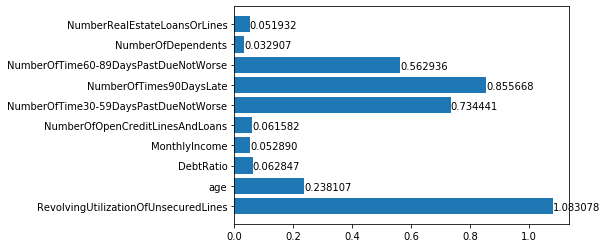

In [461]:
keys,values=zip(*iv_values.items())
nums=range(len(keys))
plt.barh(nums,values)
plt.yticks(nums,keys)
for i ,v in enumerate(values):
    plt.text(v,i-.2,f"{v:3f}")

#### WOE转换

In [462]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
29158,1,1.000000,31,0,503.000000,1158.956350,4,7,0,7,0.0
81098,0,0.089581,66,0,0.083611,10500.000000,7,0,1,0,0.0
95136,0,0.083633,77,0,0.145574,5467.000000,15,0,0,0,1.0
36970,0,0.068772,42,0,2436.000000,2554.142863,8,0,1,0,0.0
108160,0,0.070368,41,0,0.607247,2400.000000,9,0,2,0,0.0


In [463]:
woe_values

{'RevolvingUtilizationOfUnsecuredLines': SeriousDlqin2yrs      0     1       woe
 cut                                    
 (-inf, 0.117]     45091   848  1.321879
 (0.117, 0.448]    24488  1033  0.514037
 (0.448, 0.696]     9298   911 -0.328667
 (0.696, 1.0]      15064  3082 -1.064950
 (1.0, inf]         1419   852 -2.141557,
 'age': SeriousDlqin2yrs      0     1       woe
 cut                                    
 (-inf, 29.0]       5115   690 -0.648438
 (29.0, 36.0]       9236  1036 -0.463937
 (36.0, 48.0]      24556  2245 -0.259428
 (48.0, 54.0]      14023  1121 -0.125201
 (54.0, 62.0]      17818   947  0.282987
 (62.0, inf]       24612   687  0.926977,
 'DebtRatio': SeriousDlqin2yrs      0     1       woe
 cut                                    
 (-inf, 0.358]     48164  2879  0.165490
 (0.358, 0.518]    14265  1048 -0.040753
 (0.518, 1.367]    13761  1552 -0.469385
 (1.367, 1153.0]    9467   742 -0.105460
 (1153.0, inf]      9703   505  0.303953,
 'MonthlyIncome': SeriousDlqin2yrs 

In [464]:
#创建一个空的DataFrame
model_woe=pd.DataFrame(index=model_data.index)

In [417]:
for col in bins_of_col:
    model_woe[col]=pd.cut(model_data[col],bins_of_col[col]).map(woe_values[col]['woe'])

In [418]:
model_woe['SeriousDlqin2yrs']=model_data["SeriousDlqin2yrs"]

In [419]:
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberRealEstateLoansOrLines,SeriousDlqin2yrs
29158,-1.064950,-0.463937,-0.105460,-0.079644,-0.033111,0.535157,-3.099286,-3.029608,0.147026,-0.233446,1
81098,1.321879,0.926977,0.165490,0.342380,0.196261,0.535157,0.381411,0.274185,0.147026,0.236218,0
95136,1.321879,0.926977,0.165490,-0.191582,-0.051144,0.535157,0.381411,0.274185,-0.089670,-0.233446,0
36970,1.321879,-0.259428,0.303953,-0.079644,0.196261,0.535157,0.381411,0.274185,0.147026,0.236218,0
108160,1.321879,-0.259428,-0.469385,-0.079644,0.124846,0.535157,0.381411,0.274185,0.147026,0.195784,0


### 构建模型

In [ ]:
#因变量
Y=model_woe.SeriousDlqin2yrs

In [438]:
#自变量
X=model_woe.drop(['SeriousDlqin2yrs','NumberOfDependents'],axis=1)

In [547]:
test_woe=pd.DataFrame(index=test_data.index)

In [548]:
for col in bins_of_col:
    test_woe[col]=pd.cut(test_data[col],bins_of_col[col]).map(woe_values[col]['woe'])

In [549]:
test_woe['SeriousDlqin2yrs']=test_data['SeriousDlqin2yrs']

In [550]:
test_Y=test_woe['SeriousDlqin2yrs']

In [551]:
test_X=test_woe.drop(['SeriousDlqin2yrs','NumberOfDependents'],axis=1)

#### 调参


In [553]:
lr = LogisticRegression()

param = {'C':[0.001,0.01,0.1,1,10],"max_iter":[100,250]}

clf = GridSearchCV(lr,param,cv=3,n_jobs=-1,verbose=1,scoring="roc_auc")

clf.fit(X,Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [554]:
clf.cv_results_ 

{'mean_fit_time': array([0.53, 0.58, 0.67, 0.66, 0.8 , 0.84, 0.81, 0.79, 0.78, 0.65]),
 'std_fit_time': array([0.06, 0.07, 0.09, 0.07, 0.1 , 0.02, 0.02, 0.07, 0.03, 0.03]),
 'mean_score_time': array([0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.01]),
 'std_score_time': array([0.01, 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[100, 250, 100, 250, 100, 250, 100, 250, 100, 250],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001, 'max_iter': 100},
  {'C': 0.001, 'max_iter': 250},
  {'C': 0.01, 'max_iter': 100},
  {'C': 0.01, 'max_iter': 250},
  {'C': 0.1, 

In [555]:
clf.best_params_

{'C': 0.1, 'max_iter': 100}

In [573]:
#将最佳参数传入训练模型
lr = LogisticRegression(C=0.1, max_iter=100)

In [574]:
lr.fit(X,Y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [575]:
#预测结果
lr.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [576]:
predictions_pro = lr.predict_proba(test_X)
predictions_pro

array([[0.99, 0.01],
       [0.94, 0.06],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.9 , 0.1 ],
       [0.98, 0.02]])

In [559]:
print(metrics.confusion_matrix(test_Y, test_proba))

[[40398   368]
 [ 2451   535]]


In [561]:
print(metrics.classification_report(test_Y, test_proba))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     40766
           1       0.59      0.18      0.28      2986

    accuracy                           0.94     43752
   macro avg       0.77      0.59      0.62     43752
weighted avg       0.92      0.94      0.92     43752



#### roc曲线

In [580]:
#图可以显示中文
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

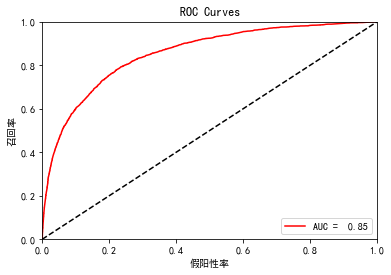

In [585]:
false_positive_rate, recall, thresholds = roc_curve(test_Y,predictions_pro[:,1])
roc_auc = auc(false_positive_rate, recall)
plt.title("ROC Curves")
plt.plot(false_positive_rate, recall, 'r', label='AUC = % 0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('假阳性率')
plt.ylabel('召回率')
plt.show()